Import Libraries 

In [353]:

import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import emoji
import re
import pickle
import warnings
warnings.filterwarnings("ignore")

In [226]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report, accuracy_score


In [227]:
import tensorflow as tf
from tensorflow.keras.models import Sequential  # type: ignore
from tensorflow.keras.layers import Dense, LSTM, Embedding, SpatialDropout1D, Dropout, Bidirectional # type: ignore
from tensorflow.keras.preprocessing.sequence import pad_sequences # type: ignore
from tensorflow.keras.preprocessing.text import Tokenizer # type: ignore


Load Data set

In [354]:
train_df = pd.read_csv('data/train.tsv',sep='\t')
dev_df = pd.read_csv('data/dev.tsv',sep='\t')

Data Cleaning , manipulation and analysis

In [229]:
train_df.head(10)

,My favourite food is anything I didn't have to cook myself.,27,eebbqej
0,"Now if he does off himself, everyone will thin...",27,ed00q6i
1,WHY THE FUCK IS BAYLESS ISOING,2,eezlygj
2,To make her feel threatened,14,ed7ypvh
3,Dirty Southern Wankers,3,ed0bdzj
4,OmG pEyToN iSn'T gOoD eNoUgH tO hElP uS iN tHe...,26,edvnz26
5,Yes I heard abt the f bombs! That has to be wh...,15,ee3b6wu
6,We need more boards and to create a bit more s...,"8,20",ef4qmod
7,Damn youtube and outrage drama is super lucrat...,0,ed8wbdn
8,It might be linked to the trust factor of your...,27,eczgv1o
9,Demographics? I don’t know anybody under 35 wh...,6,eel6g5h


In [230]:
dev_df.head(10)

,Is this in New Orleans?? I really feel like this is New Orleans.,27,edgurhb
0,"You know the answer man, you are programmed to...","4,27",ee84bjg
1,I've never been this sad in my life!,25,edcu99z
2,The economy is heavily controlled and subsidiz...,"4,27",edc32e2
3,He could have easily taken a real camera from ...,20,eepig6r
4,"Thank you for your vote of confidence, but we ...",15,eczm50f
5,Wah Mum other people call me on my bullshit an...,2,ed4yr9r
6,There it is!,27,ede4v0m
7,At least now [NAME] has more time to gain his ...,20,eekez9p
8,Good. We don't want more thrash liberal offspr...,10,ee0fxpu
9,It's better to say a moment like that could tr...,18,eelgxk0


In [231]:
train_df = pd.read_csv('data/train.tsv',sep='\t',header=None, names=['Text', 'Class', 'ID'])
dev_df = pd.read_csv('data/dev.tsv',sep='\t',header=None,names=['Text','Class','ID'])

In [232]:
train_df.head(2)


,Text,Class,ID
0,My favourite food is anything I didn't have to...,27,eebbqej
1,"Now if he does off himself, everyone will thin...",27,ed00q6i


In [233]:
dev_df.head(2)

,Text,Class,ID
0,Is this in New Orleans?? I really feel like th...,27,edgurhb
1,"You know the answer man, you are programmed to...","4,27",ee84bjg


In [234]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43410 entries, 0 to 43409
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    43410 non-null  object
 1   Class   43410 non-null  object
 2   ID      43410 non-null  object
dtypes: object(3)
memory usage: 1017.6+ KB


In [235]:
train_df.describe()

,Text,Class,ID
count,43410,43410,43410
unique,43227,711,43410
top,Thank you.,27,eebbqej
freq,13,12823,1


In [236]:
train_df.isnull().sum()

Text     0
Class    0
ID       0
dtype: int64

In [237]:
train_df['Class List'] = train_df['Class'].apply(lambda x : x.split(','))
train_df['Class List Length'] = train_df['Class List'].apply(lambda x: len(x))

In [238]:
train_df.head(10)

,Text,Class,ID,Class List,Class List Length
0,My favourite food is anything I didn't have to...,27,eebbqej,[27],1
1,"Now if he does off himself, everyone will thin...",27,ed00q6i,[27],1
2,WHY THE FUCK IS BAYLESS ISOING,2,eezlygj,[2],1
3,To make her feel threatened,14,ed7ypvh,[14],1
4,Dirty Southern Wankers,3,ed0bdzj,[3],1
5,OmG pEyToN iSn'T gOoD eNoUgH tO hElP uS iN tHe...,26,edvnz26,[26],1
6,Yes I heard abt the f bombs! That has to be wh...,15,ee3b6wu,[15],1
7,We need more boards and to create a bit more s...,"8,20",ef4qmod,"[8, 20]",2
8,Damn youtube and outrage drama is super lucrat...,0,ed8wbdn,[0],1
9,It might be linked to the trust factor of your...,27,eczgv1o,[27],1


In [239]:
dev_df['Class List'] = dev_df['Class'].apply(lambda x: x.split(','))
dev_df['Class List Length'] = dev_df['Class List'].apply(lambda X : len(X))

In [240]:
dev_df.head(10)

,Text,Class,ID,Class List,Class List Length
0,Is this in New Orleans?? I really feel like th...,27,edgurhb,[27],1
1,"You know the answer man, you are programmed to...","4,27",ee84bjg,"[4, 27]",2
2,I've never been this sad in my life!,25,edcu99z,[25],1
3,The economy is heavily controlled and subsidiz...,"4,27",edc32e2,"[4, 27]",2
4,He could have easily taken a real camera from ...,20,eepig6r,[20],1
5,"Thank you for your vote of confidence, but we ...",15,eczm50f,[15],1
6,Wah Mum other people call me on my bullshit an...,2,ed4yr9r,[2],1
7,There it is!,27,ede4v0m,[27],1
8,At least now [NAME] has more time to gain his ...,20,eekez9p,[20],1
9,Good. We don't want more thrash liberal offspr...,10,ee0fxpu,[10],1


Emotion Mapping

In [241]:
with open ('data/ekman_mapping.json') as file:
    ekman_mapping = json.load(file)

In [242]:
ekman_mapping

{'anger': ['anger', 'annoyance', 'disapproval'],
 'disgust': ['disgust'],
 'fear': ['fear', 'nervousness'],
 'joy': ['joy',
  'amusement',
  'approval',
  'excitement',
  'gratitude',
  'love',
  'optimism',
  'relief',
  'pride',
  'admiration',
  'desire',
  'caring'],
 'sadness': ['sadness', 'disappointment', 'embarrassment', 'grief', 'remorse'],
 'surprise': ['surprise', 'realization', 'confusion', 'curiosity']}

In [243]:
ekman = pd.read_csv('data/ekman_labels.csv',header=None)

In [244]:
ekman_labels = ekman.values.flatten().tolist()

In [245]:
ekman_labels

['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'neutral']

In [246]:
emotion = open('data/emotions.txt','r')
emotion_list = emotion.read()
emotion_list = emotion_list.split('\n')

In [247]:
emotion_list

['admiration',
 'amusement',
 'anger',
 'annoyance',
 'approval',
 'caring',
 'confusion',
 'curiosity',
 'desire',
 'disappointment',
 'disapproval',
 'disgust',
 'embarrassment',
 'excitement',
 'fear',
 'gratitude',
 'grief',
 'joy',
 'love',
 'nervousness',
 'optimism',
 'pride',
 'realization',
 'relief',
 'remorse',
 'sadness',
 'surprise',
 'neutral']

In [248]:
print(emotion_list[0])

admiration


In [249]:
def idx_to_class(idx_list):
    arr = []
    for i in idx_list:
        arr.append(emotion_list[int(i)])
    return arr

In [250]:
train_df['Emotions'] = train_df['Class List'].apply(idx_to_class)
dev_df['Emotions'] = dev_df['Class List'].apply(idx_to_class)

In [251]:
# train_df['Text'].to_csv('test.csv')
train_df.tail(20 )

,Text,Class,ID,Class List,Class List Length,Emotions
43390,This is my favorite reddit conversation I’ve s...,0,efgm2za,[0],1,[admiration]
43391,To calm him down I suppose.,27,eehs3kz,[27],1,[neutral]
43392,"Oh definitely, there was reports of [NAME] and...",4,eetrwsq,[4],1,[approval]
43393,"Not to nitpick, but wasn't [NAME] (I assume th...",27,efffgig,[27],1,[neutral]
43394,It is. I bet chantex and all the other 'quit s...,10,ed6chs0,[10],1,[disapproval]
43395,Sorry I kind of took it like you were flexing ...,"1,24",eelhhzc,"[1, 24]",2,"[amusement, remorse]"
43396,"Even though I didn't know you personally, but ...",0,edooilg,[0],1,[admiration]
43397,I wonder so too hehe :D,1,ed7z59z,[1],1,[amusement]
43398,I thought [NAME] was dope. Never understood th...,6,edhdwzk,[6],1,[confusion]
43399,kinda obviously satire op,27,ed9733r,[27],1,[neutral]


In [252]:
def Emotion_Mapping(emotion_list):
    map_list = []
    
    for i in emotion_list:
        if i in ekman_mapping['anger']:
            map_list.append('anger')
        if i in ekman_mapping['disgust']:
            map_list.append('disgust')
        if i in ekman_mapping['fear']:
            map_list.append('fear')
        
        if i in ekman_mapping['joy']:
            map_list.append('joy')
        
        if i in ekman_mapping['sadness']:
            map_list.append('sadness')
        
        if i in ekman_mapping['surprise']:
            map_list.append('surprise')
        
        if i == 'neutral':
            map_list.append('neutral')
                            
    # print(map_list)
    return map_list
     

In [253]:
train_df['Mapped Emotions'] = train_df['Emotions'].apply(Emotion_Mapping)
dev_df['Mapped Emotions'] = dev_df['Emotions'].apply(Emotion_Mapping)

In [254]:
train_df['anger'] = np.zeros((len(train_df),1))
train_df['disgust'] = np.zeros((len(train_df),1))
train_df['fear'] = np.zeros((len(train_df),1))
train_df['joy'] = np.zeros((len(train_df),1))
train_df['sadness'] = np.zeros((len(train_df),1))
train_df['surprise'] = np.zeros((len(train_df),1))
train_df['neutral'] = np.zeros((len(train_df),1))


In [255]:
dev_df['anger'] = np.zeros((len(dev_df),1))
dev_df['disgust'] = np.zeros((len(dev_df),1))
dev_df['fear'] = np.zeros((len(dev_df),1))
dev_df['joy'] = np.zeros((len(dev_df),1))
dev_df['sadness'] = np.zeros((len(dev_df),1))
dev_df['surprise'] = np.zeros((len(dev_df),1))
dev_df['neutral'] = np.zeros((len(dev_df),1))


In [256]:
train_df.head(5)

,Text,Class,ID,Class List,Class List Length,Emotions,Mapped Emotions,anger,disgust,fear,joy,sadness,surprise,neutral
0,My favourite food is anything I didn't have to...,27,eebbqej,[27],1,[neutral],[neutral],0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Now if he does off himself, everyone will thin...",27,ed00q6i,[27],1,[neutral],[neutral],0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,WHY THE FUCK IS BAYLESS ISOING,2,eezlygj,[2],1,[anger],[anger],0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,To make her feel threatened,14,ed7ypvh,[14],1,[fear],[fear],0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Dirty Southern Wankers,3,ed0bdzj,[3],1,[annoyance],[anger],0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [257]:
for i in ekman_labels:
    train_r = []
    
    dev_r = []
    
    for index,rows in train_df.iterrows():
        if i in rows['Mapped Emotions']:
            train_r.append(1)
        else:
            train_r.append(0)
            
    for index,rows in dev_df.iterrows():
        if i in rows['Mapped Emotions']:
            dev_r.append(1)
        else:
            dev_r.append(0)
            
    train_df[i] = train_r
    dev_df[i] = dev_r

Sentiment Mapping

In [258]:
with open('data/sentiment_dict.json','r') as f:
    sentiment = json.load(f)

In [259]:
sentiment

{'positive': ['amusement',
  'excitement',
  'joy',
  'love',
  'desire',
  'optimism',
  'caring',
  'pride',
  'admiration',
  'gratitude',
  'relief',
  'approval'],
 'negative': ['fear',
  'nervousness',
  'remorse',
  'embarrassment',
  'disappointment',
  'sadness',
  'grief',
  'disgust',
  'anger',
  'annoyance',
  'disapproval'],
 'ambiguous': ['realization', 'surprise', 'curiosity', 'confusion']}

In [260]:
train_df['Sentiment'] = train_df.apply(lambda _: '', axis=1)


In [261]:
def map_emotions_to_sentiment(emotions):
    if "neutral" in emotions:
        return "neutral"
    for sent, emotion_l in sentiment.items():
        if any(emotion in emotion_l for emotion in emotions):
            return sent
    return None

In [262]:
train_df['Sentiment'] = train_df['Emotions'].apply(map_emotions_to_sentiment)

dev_df['Sentiment'] = dev_df['Emotions'].apply(map_emotions_to_sentiment)


In [263]:
# train_df.head(5)

In [264]:
# dev_df.tail(2)

Clean Text

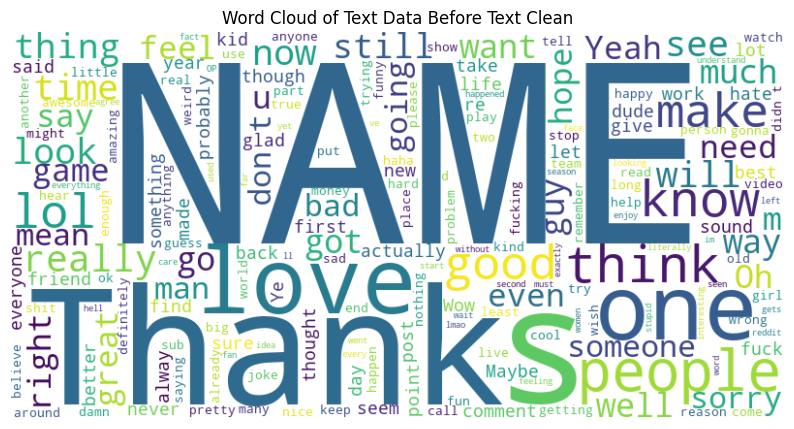

In [265]:
#Word Cloud is useful for showing the most common words in the text data.

text_data = ' '.join(train_df['Text'].astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text Data Before Text Clean')
plt.show()

Clean Text Column and correct some words if its wrong and clean text for good analysis

In [266]:
mispell_dict = {'colour': 'color', 'centre': 'center', 'favourite': 'favorite', 'travelling': 'traveling', 'counselling': 'counseling', 'theatre': 'theater',
                'cancelled': 'canceled', 'labour': 'labor', 'organisation': 'organization', 'wwii': 'world war 2', 'citicise': 'criticize', 'youtu ': 'youtube ',
                'Qoura': 'Quora', 'sallary': 'salary', 'Whta': 'What', 'narcisist': 'narcissist', 'howdo': 'how do', 'whatare': 'what are', 'howcan': 'how can',
                'howmuch': 'how much', 'howmany': 'how many', 'whydo': 'why do', 'doI': 'do I', 'theBest': 'the best', 'howdoes': 'how does', 
                'mastrubation': 'masturbation', 'mastrubate': 'masturbate', "mastrubating": 'masturbating', 'pennis': 'penis', 'Etherium': 'Ethereum', 
                'narcissit': 'narcissist', 'bigdata': 'big data', '2k17': '2017', '2k18': '2018', 'qouta': 'quota', 'exboyfriend': 'ex boyfriend', 
                'airhostess': 'air hostess', "whst": 'what', 'watsapp': 'whatsapp', 'demonitisation': 'demonetization', 'demonitization': 'demonetization',
                'demonetisation': 'demonetization'}\
                    
punct = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£', 
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', 
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', 
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', 
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

punct_mapping = {"‘": "'", "₹": "e", "´": "'", "°": "", "€": "e", "™": "tm", "√": " sqrt ", "×": "x", "²": "2", "—": "-", "–": "-", "’": "'", "_": "-",
                 "`": "'", '“': '"', '”': '"', '“': '"', "£": "e", '∞': 'infinity', 'θ': 'theta', '÷': '/', 'α': 'alpha', '•': '.', 'à': 'a', '−': '-', 
                 'β': 'beta', '∅': '', '³': '3', 'π': 'pi', '!':' '}

In [267]:
def clean(text):
    text = emoji.demojize(text)
    text = re.sub(r'\:(.*?)\:','',text)
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub(r"[^a-zA-Z?.!,¿']+", " ", text)
    return text

In [268]:
def special_chars(text, punct, mapping):
    for p in mapping:
        text = text.replace(p, mapping[p])
    
    for p in punct:
        text = text.replace(p, f' {p} ')
    
    specials = {'\u200b': ' ', '…': ' ... ', '\ufeff': '', 'करना': '', 'है': ''}  
    for s in specials:
        text = text.replace(s, specials[s])
    
    return text

In [269]:
def correct_spelling(x, dic):  
    for word in dic.keys():
        x = x.replace(word, dic[word])
    return x

In [270]:
def text_preprocessing(text):
    text = clean(text)
    text = special_chars(text, punct, punct_mapping)
    text = correct_spelling(text, mispell_dict)

    return text

In [271]:
train_df['Text'] = train_df['Text'].apply(text_preprocessing)
dev_df['Text'] = dev_df['Text'].apply(text_preprocessing)

In [272]:
train_df.drop(['Class','ID','Class List','Class List Length','Emotions','Mapped Emotions'],axis=1, inplace=True)

In [273]:
dev_df.drop(['ID','Class','Class List','Class List Length','Emotions','Mapped Emotions'],axis=1 , inplace=True)

In [274]:
# for col in train_df.columns[1:]:
#     print(f'{col}:\n',train_df[col].value_counts())
#     print('\n')

Data Visualization

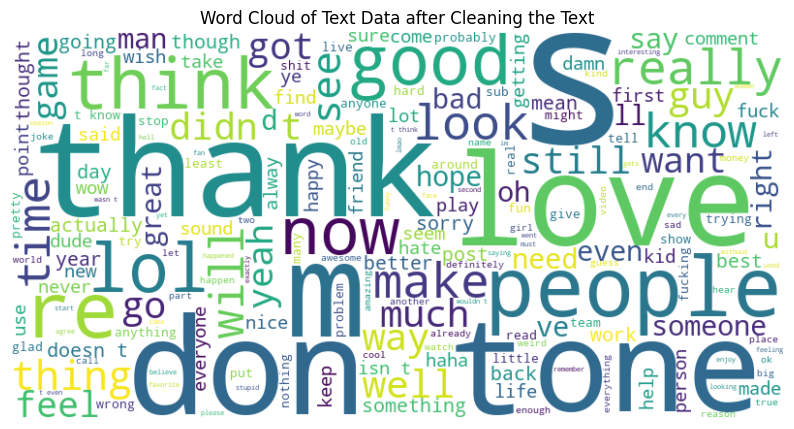

In [275]:
text_data = ' '.join(train_df['Text'].astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text Data after Cleaning the Text')
plt.show()

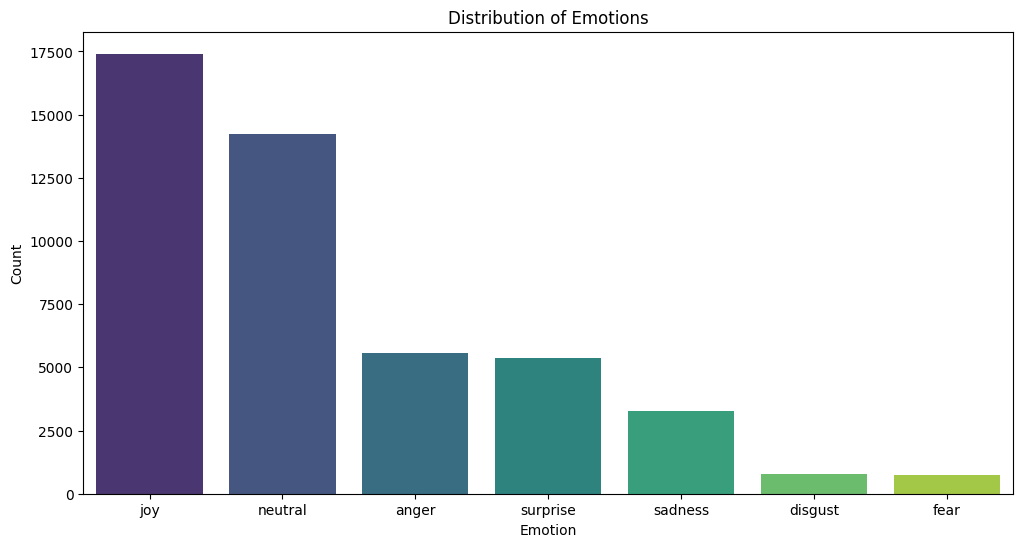

In [276]:
#Bar Plots are useful for showing the frequency of each emotion in the dataset.

emotion_counts = train_df[['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'neutral']].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette='viridis')
plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

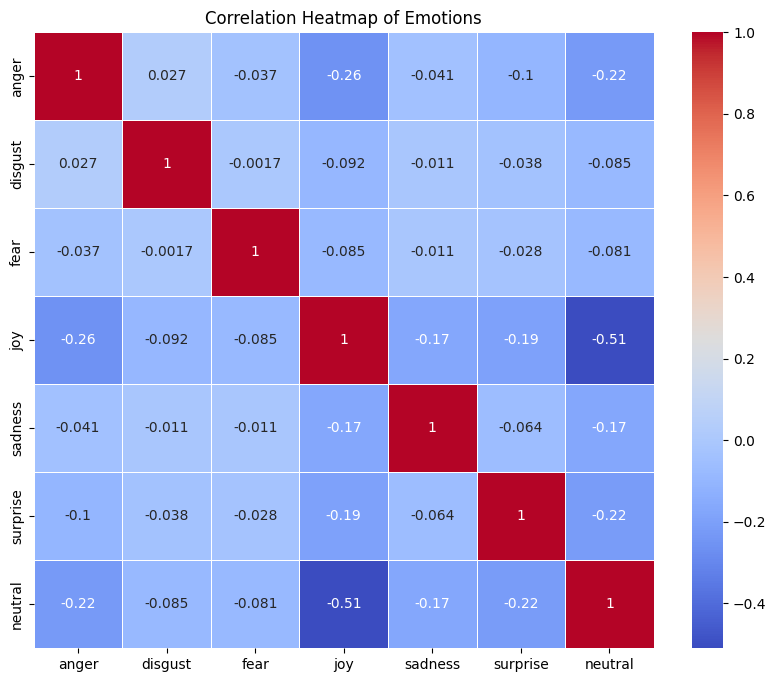

In [277]:
#Heatmap useful for showing the correlation between different emotions.

correlation_matrix = train_df[['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'neutral']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Emotions')
plt.show()


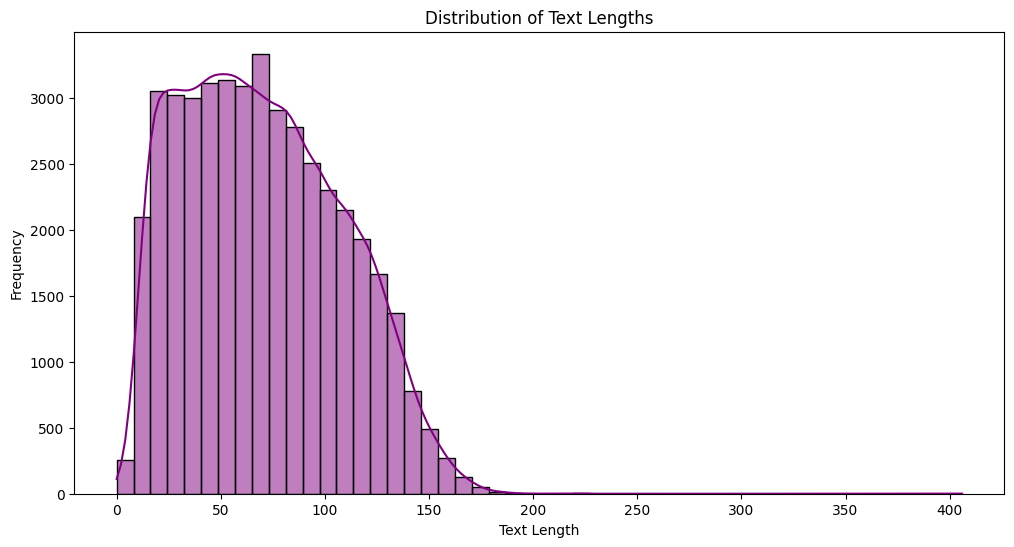

In [278]:
#Histogram is useful for showing the distribution of text lengths in the dataset.


text_lengths = train_df['Text'].apply(len)
plt.figure(figsize=(12, 6))
sns.histplot(text_lengths, kde=True, bins=50, color='purple')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


In [279]:
print('shape of train data : ',train_df.shape)
print('shape of dev data : ',dev_df.shape)

shape of train data :  (43410, 9)
shape of dev data :  (5426, 9)


Model Making

In [280]:
X = train_df['Text']
y_emotions = train_df[['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'neutral']]
y_sentiment = train_df['Sentiment']



In [281]:
X_dev = dev_df['Text']
y_emotions_dev = dev_df[['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'neutral']]
y_sentiment_dev = dev_df['Sentiment']

In [282]:

label_encoder = LabelEncoder()
y_sentiment_train_encoded = label_encoder.fit_transform(y_sentiment)
y_sentiment_dev_encoded = label_encoder.transform(y_sentiment_dev)

In [283]:
# Split the dataset into training and testing sets
X_train, X_test, y_emotions_train, y_emotions_test, y_sentiment_train, y_sentiment_test = train_test_split(
    X, y_emotions, y_sentiment_train_encoded, test_size=0.2, random_state=42)

In [284]:

# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
X_dev_tfidf = tfidf_vectorizer.transform(X_dev)



In [285]:

# Display shapes of the processed data
X_train_tfidf.shape, X_test_tfidf.shape, y_emotions_train.shape, y_emotions_test.shape, y_sentiment_train.shape, y_sentiment_test.shape

((34728, 10000), (8682, 10000), (34728, 7), (8682, 7), (34728,), (8682,))

In [286]:
# Print shapes of the datasets to identify the inconsistency
print(f"Shape of X_train_tfidf: {X_train_tfidf.shape}")
print(f"Shape of X_test_tfidf: {X_test_tfidf.shape}")
print(f"Shape of X_dev_tfidf: {X_dev_tfidf.shape}")
print(f"Shape of y_emotions_train: {y_emotions_train.shape}")
print(f"Shape of y_emotions_test: {y_emotions_test.shape}")
print(f"Shape of y_emotions_dev: {y_emotions_dev.shape}")
print(f"Shape of y_sentiment_train: {y_sentiment_train.shape}")
print(f"Shape of y_sentiment_test: {y_sentiment_test.shape}")
print(f"Shape of y_sentiment_dev_encoded: {y_sentiment_dev_encoded.shape}")



Shape of X_train_tfidf: (34728, 10000)
Shape of X_test_tfidf: (8682, 10000)
Shape of X_dev_tfidf: (5426, 10000)
Shape of y_emotions_train: (34728, 7)
Shape of y_emotions_test: (8682, 7)
Shape of y_emotions_dev: (5426, 7)
Shape of y_sentiment_train: (34728,)
Shape of y_sentiment_test: (8682,)
Shape of y_sentiment_dev_encoded: (5426,)


In [288]:


# Adjusted train_evaluate_model function to include validation evaluation
def train_evaluate_model(model, X_train, y_train, X_test, y_test, X_dev, y_dev):
    model.fit(X_train, y_train)
    
    # Evaluate on test set
    test_predictions = model.predict(X_test)
    test_report = classification_report(y_test, test_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    
    # Evaluate on validation set
    dev_predictions = model.predict(X_dev)
    dev_report = classification_report(y_dev, dev_predictions)
    dev_accuracy = accuracy_score(y_dev, dev_predictions)
    
    return test_report, test_accuracy, dev_report, dev_accuracy



In [289]:
# Initialize models for emotion prediction
logreg_emotion_model = MultiOutputClassifier(LogisticRegression(max_iter=1000, random_state=42))
rf_emotion_model = MultiOutputClassifier(RandomForestClassifier(random_state=42))


In [291]:
# # Train and evaluate Logistic Regression for emotion prediction
logreg_emotion_test_report, logreg_emotion_test_accuracy, logreg_emotion_dev_report, logreg_emotion_dev_accuracy = train_evaluate_model(
    logreg_emotion_model, X_train_tfidf, y_emotions_train, X_test_tfidf, y_emotions_test, X_dev_tfidf, y_emotions_dev)


In [293]:
# Train and evaluate Random Forest for emotion prediction
rf_emotion_test_report, rf_emotion_test_accuracy, rf_emotion_dev_report, rf_emotion_dev_accuracy = train_evaluate_model(
    rf_emotion_model, X_train_tfidf, y_emotions_train, X_test_tfidf, y_emotions_test, X_dev_tfidf, y_emotions_dev)


In [294]:
# Train and evaluate Random Forest for emotion prediction
rf_emotion_test_report, rf_emotion_test_accuracy, rf_emotion_dev_report, rf_emotion_dev_accuracy = train_evaluate_model(
    rf_emotion_model, X_train_tfidf, y_emotions_train, X_test_tfidf, y_emotions_test, X_dev_tfidf, y_emotions_dev)


# rf_sentiment_test_report, rf_sentiment_test_accuracy, rf_sentiment_dev_report, rf_sentiment_dev_accuracy = train_evaluate_model(
#     rf_sentiment_model, X_train_tfidf, y_sentiment_train_encoded, X_test_tfidf, y_sentiment_test, X_dev_tfidf, y_sentiment_dev_encoded)


In [295]:
print(f'Logistic Regression Emotion Test Report:\n{logreg_emotion_test_report}')
print(f'Logistic Regression Emotion Test Accuracy: {logreg_emotion_test_accuracy}')
print(f'Logistic Regression Emotion Dev Report:\n{logreg_emotion_dev_report}')
print(f'Logistic Regression Emotion Dev Accuracy: {logreg_emotion_dev_accuracy}')


Logistic Regression Emotion Test Report:
              precision    recall  f1-score   support

           0       0.71      0.15      0.25      1096
           1       0.82      0.06      0.11       156
           2       0.77      0.07      0.13       143
           3       0.87      0.67      0.76      3531
           4       0.77      0.18      0.29       651
           5       0.72      0.18      0.29      1061
           6       0.64      0.42      0.51      2812

   micro avg       0.77      0.43      0.55      9450
   macro avg       0.76      0.25      0.33      9450
weighted avg       0.76      0.43      0.52      9450
 samples avg       0.46      0.45      0.45      9450

Logistic Regression Emotion Test Accuracy: 0.4231743837825386
Logistic Regression Emotion Dev Report:
              precision    recall  f1-score   support

           0       0.68      0.12      0.20       717
           1       0.57      0.04      0.08        97
           2       0.81      0.12      0.21

In [296]:
print(f'Random Forest Emotion Test Report:\n{rf_emotion_test_report}')
print(f'Random Forest Emotion Test Accuracy: {rf_emotion_test_accuracy}')
print(f'Random Forest Emotion Dev Report:\n{rf_emotion_dev_report}')
print(f'Random Forest Emotion Dev Accuracy: {rf_emotion_dev_accuracy}')


Random Forest Emotion Test Report:
              precision    recall  f1-score   support

           0       0.64      0.23      0.33      1096
           1       0.88      0.22      0.36       156
           2       0.59      0.23      0.33       143
           3       0.85      0.69      0.76      3531
           4       0.76      0.38      0.51       651
           5       0.69      0.18      0.29      1061
           6       0.64      0.32      0.42      2812

   micro avg       0.76      0.43      0.55      9450
   macro avg       0.72      0.32      0.43      9450
weighted avg       0.73      0.43      0.53      9450
 samples avg       0.45      0.45      0.44      9450

Random Forest Emotion Test Accuracy: 0.4052061736926975
Random Forest Emotion Dev Report:
              precision    recall  f1-score   support

           0       0.60      0.19      0.29       717
           1       0.81      0.22      0.34        97
           2       0.70      0.30      0.42       105
       

In [298]:

# Initialize models for sentiment analysis
logreg_sentiment_model = LogisticRegression(max_iter=1000, random_state=42)
rf_sentiment_model = RandomForestClassifier(random_state=42)


In [300]:
# Train and evaluate Logistic Regression for sentiment analysis
logreg_sentiment_test_report, logreg_sentiment_test_accuracy, logreg_sentiment_dev_report, logreg_sentiment_dev_accuracy = train_evaluate_model(
    logreg_sentiment_model, X_train_tfidf, y_sentiment_train, X_test_tfidf, y_sentiment_test, X_dev_tfidf, y_sentiment_dev_encoded)



In [301]:
# Print shapes of the datasets to identify the inconsistency
print(f"Shape of X_train_tfidf: {X_train_tfidf.shape}")
print(f"Shape of y_sentiment_train_encoded: {y_sentiment_train_encoded.shape}")
print(f"Shape of X_test_tfidf: {X_test_tfidf.shape}")
print(f"Shape of y_sentiment_test: {y_sentiment_test.shape}")
print(f"Shape of X_dev_tfidf: {X_dev_tfidf.shape}")
print(f"Shape of y_sentiment_dev_encoded: {y_sentiment_dev_encoded.shape}")


Shape of X_train_tfidf: (34728, 10000)
Shape of y_sentiment_train_encoded: (43410,)
Shape of X_test_tfidf: (8682, 10000)
Shape of y_sentiment_test: (8682,)
Shape of X_dev_tfidf: (5426, 10000)
Shape of y_sentiment_dev_encoded: (5426,)


In [307]:
rf_sentiment_test_report, rf_sentiment_test_accuracy, rf_sentiment_dev_report, rf_sentiment_dev_accuracy = train_evaluate_model(
    rf_sentiment_model, X_train_tfidf, y_sentiment_train, X_test_tfidf, y_sentiment_test, X_dev_tfidf, y_sentiment_dev_encoded)


In [310]:
print(f'Logistic Regression Sentiment Test Report:\n{logreg_sentiment_test_report}')
print(f'Logistic Regression Sentiment Test Accuracy: {logreg_sentiment_test_accuracy}')
print(f'Logistic Regression Sentiment Dev Report:\n{logreg_sentiment_dev_report}')
print(f'Logistic Regression Sentiment Dev Accuracy: {logreg_sentiment_dev_accuracy}')


Logistic Regression Sentiment Test Report:
              precision    recall  f1-score   support

           0       0.59      0.27      0.37       755
           1       0.64      0.48      0.55      1693
           2       0.55      0.73      0.63      2812
           3       0.78      0.77      0.77      3422

    accuracy                           0.66      8682
   macro avg       0.64      0.56      0.58      8682
weighted avg       0.66      0.66      0.65      8682

Logistic Regression Sentiment Test Accuracy: 0.6550334024418337
Logistic Regression Sentiment Dev Report:
              precision    recall  f1-score   support

           0       0.55      0.24      0.33       459
           1       0.60      0.45      0.51      1059
           2       0.55      0.73      0.63      1766
           3       0.78      0.77      0.78      2142

    accuracy                           0.65      5426
   macro avg       0.62      0.55      0.56      5426
weighted avg       0.65      0.65   

In [311]:
print(f'Random Forest Sentiment Test Report:\n{rf_sentiment_test_report}')
print(f'Random Forest Sentiment Test Accuracy: {rf_sentiment_test_accuracy}')
print(f'Random Forest Sentiment Dev Report:\n{rf_sentiment_dev_report}')
print(f'Random Forest Sentiment Dev Accuracy: {rf_sentiment_dev_accuracy}')

Random Forest Sentiment Test Report:
              precision    recall  f1-score   support

           0       0.62      0.20      0.30       755
           1       0.67      0.37      0.48      1693
           2       0.52      0.79      0.63      2812
           3       0.78      0.74      0.76      3422

    accuracy                           0.64      8682
   macro avg       0.65      0.53      0.54      8682
weighted avg       0.66      0.64      0.62      8682

Random Forest Sentiment Test Accuracy: 0.638217000691085
Random Forest Sentiment Dev Report:
              precision    recall  f1-score   support

           0       0.60      0.19      0.29       459
           1       0.66      0.37      0.47      1059
           2       0.52      0.79      0.63      1766
           3       0.79      0.74      0.76      2142

    accuracy                           0.64      5426
   macro avg       0.64      0.52      0.54      5426
weighted avg       0.66      0.64      0.62      5426



In [312]:
# Tokenization and padding
tokenizer = Tokenizer(num_words=10000, lower=True)
tokenizer.fit_on_texts(X_train)


In [313]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_dev_seq = tokenizer.texts_to_sequences(X_dev)


In [314]:

X_train_pad = pad_sequences(X_train_seq, maxlen=200)
X_test_pad = pad_sequences(X_test_seq, maxlen=200)
X_dev_pad = pad_sequences(X_dev_seq, maxlen=200)


In [315]:


def create_lstm_model(output_dim, output_activation):
    model = Sequential()
    model.add(Embedding(input_dim=10000, output_dim=128, input_length=200))
    model.add(SpatialDropout1D(0.3))
    model.add(Bidirectional(LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.3)))
    model.add(Bidirectional(LSTM(64, dropout=0.3, recurrent_dropout=0.3)))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(output_dim, activation=output_activation))
    model.compile(loss='binary_crossentropy' if output_activation == 'sigmoid' else 'categorical_crossentropy',
                  optimizer='adam', metrics=['accuracy'])
    return model


output_dim = 7  
output_activation = 'sigmoid'  

In [316]:

# Emotion Prediction Model
lstm_emotion_model = create_lstm_model(output_dim=7, output_activation='sigmoid')
lstm_emotion_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │   0 (unbuilt) │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [318]:
lstm_emotion_model.fit(X_train_pad, y_emotions_train, epochs=20, batch_size=64, validation_data=(X_dev_pad, y_emotions_dev), verbose=1)


Epoch 1/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 248s 450ms/step - accuracy: 0.3827 - loss: 0.3845 - val_accuracy: 0.5542 - val_loss: 0.2921
Epoch 2/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 250s 460ms/step - accuracy: 0.5697 - loss: 0.2892 - val_accuracy: 0.5866 - val_loss: 0.2735
Epoch 3/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 252s 464ms/step - accuracy: 0.6202 - loss: 0.2630 - val_accuracy: 0.6023 - val_loss: 0.2670
Epoch 4/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 262s 482ms/step - accuracy: 0.6565 - loss: 0.2436 - val_accuracy: 0.6071 - val_loss: 0.2633
Epoch 5/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 264s 486ms/step - accuracy: 0.7010 - loss: 0.2224 - val_accuracy: 0.6082 - val_loss: 0.2650
Epoch 6/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 264s 487ms/step - accuracy: 0.7166 - loss: 0.2090 - val_accuracy: 0.6047 - val_loss: 0.2693
Epoch 7/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 341s 628ms/step - accuracy: 0.7324 - loss: 0.1986 - val_accuracy: 0.5988 - val_loss: 0.2865
Epoch 8/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 263s 485ms/step - accuracy: 0.7516 -

In [319]:
# Evaluate the LSTM models
emotion_preds = lstm_emotion_model.predict(X_test_pad)
emotion_report = classification_report(y_emotions_test, (emotion_preds > 0.5).astype(int))
emotion_accuracy = accuracy_score(y_emotions_test, (emotion_preds > 0.5).astype(int))


272/272 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step


In [320]:
print("LSTM Emotion Prediction Report:\n", emotion_report)
print("LSTM Emotion Prediction Accuracy:", emotion_accuracy)

LSTM Emotion Prediction Report:
               precision    recall  f1-score   support

           0       0.49      0.40      0.44      1096
           1       0.44      0.40      0.42       156
           2       0.56      0.49      0.52       143
           3       0.76      0.77      0.76      3531
           4       0.59      0.46      0.52       651
           5       0.50      0.30      0.38      1061
           6       0.56      0.55      0.56      2812

   micro avg       0.63      0.58      0.60      9450
   macro avg       0.56      0.48      0.51      9450
weighted avg       0.62      0.58      0.59      9450
 samples avg       0.60      0.60      0.59      9450

LSTM Emotion Prediction Accuracy: 0.5299470168164018


Test Models on a sample data

In [321]:
def preprocess_text(text, tokenizer, tfidf_vectorizer):
    text_seq = tokenizer.texts_to_sequences([text])
    text_pad = pad_sequences(text_seq, maxlen=200)
    text_tfidf = None
    if tfidf_vectorizer is not None:
        text_tfidf = tfidf_vectorizer.transform([text])
    return text_pad, text_tfidf

In [322]:
# Prediction Functions
def predict_emotion_ml(text, tokenizer, tfidf_vectorizer, model, emotion_labels):
    _, text_tfidf = preprocess_text(text, tokenizer, tfidf_vectorizer)
    predictions = model.predict(text_tfidf)
    predicted_emotion = emotion_labels[np.argmax(predictions)]
    return predicted_emotion

def predict_emotion_nn(text, tokenizer, model, emotion_labels):
    text_pad, _ = preprocess_text(text, tokenizer, None)
    predictions = model.predict(text_pad)
    predicted_emotion = emotion_labels[np.argmax(predictions)]
    return predicted_emotion

def predict_sentiment_ml(text, tokenizer, tfidf_vectorizer, model, label_encoder):
    _, text_tfidf = preprocess_text(text, tokenizer, tfidf_vectorizer)
    prediction = model.predict(text_tfidf)
    sentiment_labels = label_encoder.inverse_transform([np.argmax(prediction)])
    return sentiment_labels[0]

In [323]:
text_input = "I am so happy with the results!" # sample data

emotion_labels = ['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'neutral']

# Make predictions
predicted_emotion_logreg = predict_emotion_ml(text_input, tokenizer, tfidf_vectorizer, logreg_emotion_model, emotion_labels)
predicted_emotion_rf = predict_emotion_ml(text_input, tokenizer, tfidf_vectorizer, rf_emotion_model, emotion_labels)
predicted_emotion_nn = predict_emotion_nn(text_input, tokenizer, lstm_emotion_model, emotion_labels)
predicted_sentiment = predict_sentiment_ml(text_input, tokenizer, tfidf_vectorizer, logreg_sentiment_model, label_encoder)

print("Predicted Emotion (Logistic Regression):", predicted_emotion_logreg)
print("Predicted Emotion (Random Forest):", predicted_emotion_rf)
print("Predicted Emotion (LSTM):", predicted_emotion_nn)
print("Predicted Sentiment:", predicted_sentiment)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted Emotion (Logistic Regression): joy
Predicted Emotion (Random Forest): joy
Predicted Emotion (LSTM): joy
Predicted Sentiment: ambiguous


Save Models

In [334]:
filename = 'rf_emotion_model.pkl'
pickle.dump(rf_emotion_model, open(filename, 'wb'))

In [337]:
filename = 'rf_sentiment_model.pkl'
pickle.dump(rf_emotion_model, open(filename, 'wb'))

In [335]:
filename = 'logreg_emotion_model.pkl'
pickle.dump(logreg_emotion_model, open(filename, 'wb'))

In [338]:
filename = 'logreg_sentiment_model.pkl'
pickle.dump(logreg_emotion_model, open(filename, 'wb'))

In [328]:
lstm_emotion_model.save('lstm_emotion_model.h5')


In [329]:
from tensorflow.keras.models import load_model


In [330]:
loaded_lstm_model = load_model('lstm_emotion_model.h5')


Prediction on Test Data

In [332]:
emotion_preds_test = loaded_lstm_model.predict(X_test_pad)
emotion_preds_dev = loaded_lstm_model.predict(X_dev_pad)


print("LSTM Emotion Test Predictions:", emotion_preds_test)
print("LSTM Emotion Dev Predictions:", emotion_preds_dev)

272/272 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step
LSTM Emotion Test Predictions: [[1.83380398e-04 3.15165453e-05 6.26723886e-06 ... 1.45611164e-04
  2.09382371e-04 9.99410689e-01]
 [1.16434723e-01 1.07111834e-01 1.32015534e-02 ... 2.54006892e-01
  7.33918836e-03 4.91102666e-01]
 [7.94519554e-04 2.26386928e-05 8.17978344e-06 ... 2.52567901e-04
  5.81507850e-03 9.79031563e-01]
 ...
 [1.37526831e-02 9.49791574e-04 1.46942411e-03 ... 8.08773994e-01
  5.94880152e-03 6.99778572e-02]
 [1.61546736e-03 1.15619868e-03 4.47317213e-03 ... 7.92370364e-03
  2.06222245e-03 9.78357732e-01]
 [2.24965680e-02 9.87477135e-04 1.43472035e-03 ... 1.27093820e-02
  5.78793213e-02 6.35362148e-01]]
LSTM Emotion Dev Predictions: [[1.42580573e-03 1.11060348e-04 2.34577135e-04 ... 2.88585783e-03
  2.12021843e-02 5.47596633e-01]
 [2.40964055e-05 2.58242449e-06 3.01574943e-07 ... 8.12302824e-06
  1.59125648e-05 9.99860942e-01]
 [7.19881207e-02 8.47227871e-03 4.86312807e-03 ... 7.5551